In [1]:
# Import libraries

import matplotlib
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import figure
import math

%matplotlib inline 

In [2]:
# Loading data into a data frame variable
# Data(movies) source: https://www.kaggle.com/datasets/danielgrijalvas/movies/

movies = pd.read_csv('C:\Projekty\Python data cleaning\movies.csv')

In [3]:
# Checking the variable type

type(movies)

pandas.core.frame.DataFrame

In [4]:
# Display the data header

movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
# Displaying information about data frame object

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
# Searching for missing data

for col in movies.columns:
    missing_percentage = np.mean(movies[col].isnull()) * 100
    print('{} - {}%'.format(col,missing_percentage))

name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


In [7]:
# Count the number of missing data

missing_data = {}

columns_to_check = ['rating', 'released', 'score', 'votes', 'writer', 'star', 'country', 'budget', 'gross', 'company', 'runtime']

for col in columns_to_check:
    missing_data[col] = movies[col].isnull().sum()
    
missing_data

{'rating': 77,
 'released': 2,
 'score': 3,
 'votes': 3,
 'writer': 3,
 'star': 1,
 'country': 3,
 'budget': 2171,
 'gross': 189,
 'company': 17,
 'runtime': 4}

In [8]:
# Deleting incomplete rows 

movies.dropna(how='any',inplace=True)

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [10]:
# Checking the uniqueness of movies

movies['name'].is_unique

False

In [11]:
# look at the number of unique movies \\ All listed movies: 5421

len(movies['name'].unique())

5336

In [12]:
# Deleting repetitive movies // movies.drop_duplicates(subset='name',keep='first') - works the same 

uniqueValues = movies['name'].duplicated(keep='first')
movies = movies[~uniqueValues]
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [13]:
# Checking data types

movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [14]:
# Changing important data types

movies['budget'] = movies['budget'].astype('int64')
movies['gross'] = movies['gross'].astype('int64')

In [15]:
# Create corrrect year column
# Values in the 'year' and 'released' columns do not always match, so we create a new column considering only the year from the 'released' column

movies['CorrectYear'] = movies['released'].astype('str').str.extract(r'(\d{4})')
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,CorrectYear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [16]:
# Sorting data based on the gross column

movies = movies.sort_values(by=['gross'],inplace=False,ascending=False)

In [17]:
pd.set_option('display.max_rows', None)

In [18]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,CorrectYear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [19]:
# Pedictions of possible correlations
# - budget high correlation
# - company high correlation

Text(0, 0.5, 'Film budget')

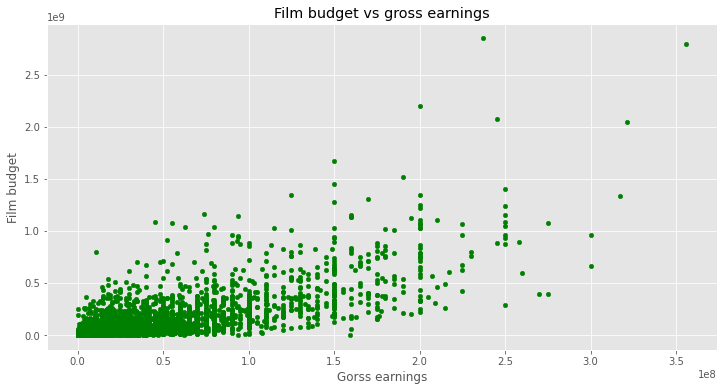

In [20]:
# budget/gross correlation search

matplotlib.rcParams['figure.figsize'] = (12,6) 
plt.style.use('ggplot')

movies.plot(kind='scatter',x='budget', y='gross', color = 'green')

plt.title('Film budget vs gross earnings')
plt.xlabel('Gorss earnings')
plt.ylabel('Film budget')

<AxesSubplot:xlabel='budget', ylabel='gross'>

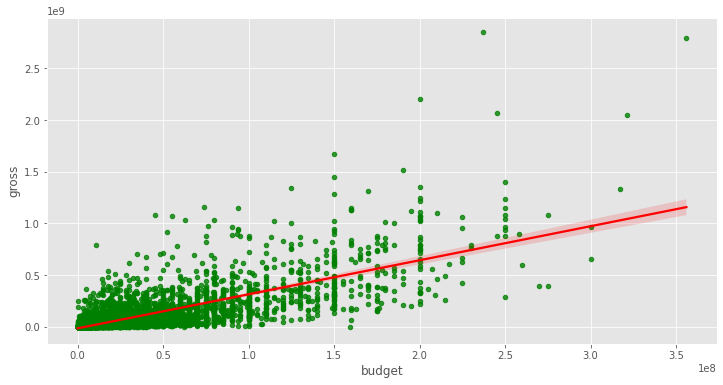

In [21]:
# When searching for correlations, we want to apply a regression line
# Instead of calculating the coefficient using the numpy module, we can utilize the ready-made formula from the seaborn library

sns.regplot(x='budget', y='gross',data=movies, color = 'green', scatter_kws= {"s": 20}, line_kws = {"color": "red"})

In [22]:
# Look at correlation table 

movies.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.061236,0.207542,0.326118,0.271863,0.075414
score,0.061236,1.000000,0.473250,0.071325,0.222235,0.413459
votes,0.207542,0.473250,1.000000,0.438567,0.618162,0.348798
budget,0.326118,0.071325,0.438567,1.000000,0.737723,0.317912
gross,0.271863,0.222235,0.618162,0.737723,1.000000,0.276189
runtime,0.075414,0.413459,0.348798,0.317912,0.276189,1.000000


In [23]:
# Correlation matrix confirms that there is a correlation between budget and gross earnings colums

Text(87.0, 0.5, 'Movie features')

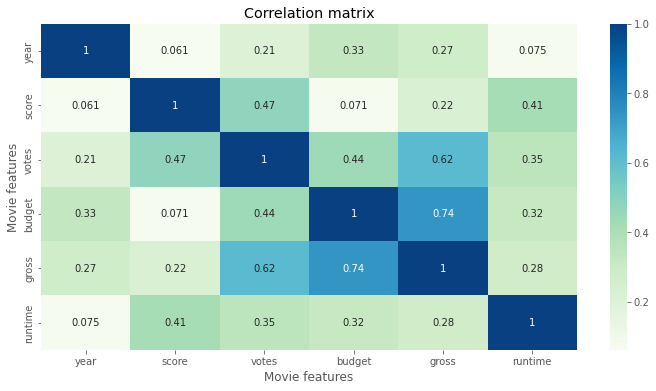

In [24]:
corr_matrix = movies.corr(method='pearson')

sns.heatmap(corr_matrix, annot=True,cmap='GnBu')

plt.title('Correlation matrix')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

In [25]:
# Company correlation search

In [26]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,CorrectYear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [27]:
# To check correlation, we transform data types to numeric values

movies_numeric = movies.copy()

for col_name in movies_numeric.columns:
    if(movies_numeric[col_name].dtype == 'object'):
        movies_numeric[col_name] = movies_numeric[col_name].astype('category')
        movies_numeric[col_name] = movies_numeric[col_name].cat.codes
        
movies_numeric.head()    

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,CorrectYear
5445,386,5,0,2009,525,7.8,1100000.0,780,1251,1523,47,237000000,2847246203,1372,162.0,29
7445,388,5,0,2019,137,8.4,903000.0,105,509,1461,47,356000000,2797501328,976,181.0,39
3045,4909,5,6,1997,532,7.8,1100000.0,780,1251,1065,47,200000000,2201647264,1372,194.0,17
6663,3643,5,0,2015,527,7.8,876000.0,763,1788,356,47,245000000,2069521700,939,138.0,35
7244,389,5,0,2018,145,8.4,897000.0,105,509,1461,47,321000000,2048359754,976,149.0,38


In [28]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,CorrectYear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


Text(87.0, 0.5, 'Movie features')

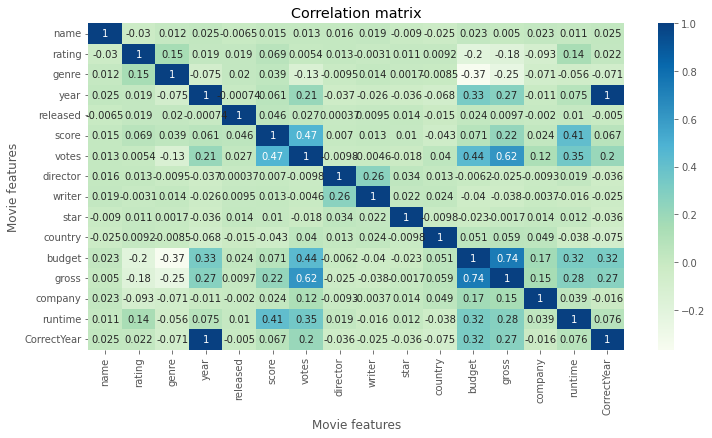

In [29]:
# look at the correlation visualization

corr_matrix = movies_numeric.corr(method='pearson')

sns.heatmap(corr_matrix, annot=True,cmap='GnBu')
plt.title('Correlation matrix')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

In [30]:
movies_numeric.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,CorrectYear
name,1.000000,-0.029775,0.011915,0.025221,-0.006524,0.014977,0.012862,0.016134,0.018693,-0.009025,-0.025491,0.023097,0.004959,0.023055,0.010925,0.025243
rating,-0.029775,1.000000,0.148543,0.018993,0.018745,0.068714,0.005407,0.012756,-0.003142,0.010559,0.009236,-0.202192,-0.178963,-0.093193,0.144582,0.021540
genre,0.011915,0.148543,1.000000,-0.075050,0.020174,0.039223,-0.134223,-0.009479,0.013931,0.001744,-0.008524,-0.366326,-0.246023,-0.070841,-0.055838,-0.070898
year,0.025221,0.018993,-0.075050,1.000000,-0.000740,0.061236,0.207542,-0.036977,-0.025805,-0.035542,-0.068017,0.326118,0.271863,-0.011337,0.075414,0.998707
released,-0.006524,0.018745,0.020174,-0.000740,1.000000,0.045525,0.027054,0.000370,0.009538,0.014112,-0.014850,0.024285,0.009682,-0.002003,0.009972,-0.005048
score,0.014977,0.068714,0.039223,0.061236,0.045525,1.000000,0.473250,0.007000,0.013292,0.010328,-0.043140,0.071325,0.222235,0.024070,0.413459,0.066723
votes,0.012862,0.005407,-0.134223,0.207542,0.027054,0.473250,1.000000,-0.009761,-0.004604,-0.018431,0.040218,0.438567,0.618162,0.122424,0.348798,0.204546
director,0.016134,0.012756,-0.009479,-0.036977,0.000370,0.007000,-0.009761,1.000000,0.263424,0.034178,0.013129,-0.006229,-0.025160,-0.009265,0.019221,-0.036030
writer,0.018693,-0.003142,0.013931,-0.025805,0.009538,0.013292,-0.004604,0.263424,1.000000,0.022187,0.024470,-0.040011,-0.037735,-0.003672,-0.016465,-0.025351
star,-0.009025,0.010559,0.001744,-0.035542,0.014112,0.010328,-0.018431,0.034178,0.022187,1.000000,-0.009764,-0.022859,-0.001711,0.014075,0.011889,-0.035985


In [31]:
# Extracting the highest correlations from the received data

corr_matrix = movies_numeric.corr()

corr_pairs = corr_matrix.unstack()

sorted_pairs = corr_pairs.sort_values()

sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs < 1)]

votes        gross          0.618162
gross        votes          0.618162
             budget         0.737723
budget       gross          0.737723
year         CorrectYear    0.998707
CorrectYear  year           0.998707
dtype: float64

In [32]:
# Conclusions
# Votes and budget have the highest correlation, indicating their impact on gross earnings
# The prediction of high company correlation did not come true